In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import re
import pandas as pd

file_path = '/content/sample_data/post_data.xlsx'
info = pd.read_excel(file_path)

profile_info_column = 'Information'

# Ensure all values in the column are strings and replace NaN with an empty string
info[profile_info_column] = info[profile_info_column].fillna("").astype(str)

# Function to extract numbers using regex
def extract_numbers(info):
    match = re.match(r"([\d,]+) posts \| ([\d.,MK]+) followers \| ([\d,]+) following", info)
    if match:
        # Extract posts, followers, and following
        posts = int(match.group(1).replace(",", ""))
        followers = match.group(2)
        following = int(match.group(3).replace(",", ""))

        # Convert followers to a number
        if 'M' in followers:
            followers = int(float(followers.replace("M", "")) * 1_000_000)
        elif 'K' in followers:
            followers = int(float(followers.replace("K", "")) * 1_000)
        else:
            followers = int(followers.replace(",", ""))

        return posts, followers, following
    else:
        # Return None if the pattern doesn't match
        return None, None, None

# Apply the function and split the results into separate columns
info[['posts', 'followers', 'following']] = info[profile_info_column].apply(
    lambda x: pd.Series(extract_numbers(x))
)

# Print the extracted data
print(info[['posts', 'followers', 'following']].head())

    posts  followers  following
0  1139.0  3200000.0        6.0
1     NaN        NaN        NaN
2     NaN        NaN        NaN
3     NaN        NaN        NaN
4     NaN        NaN        NaN


In [3]:
with open('/content/sample_data/beebomco_data.json', 'r') as file:
    data = json.load(file)

In [4]:
posts = data['posts']
posts_data = []

for post_key, post in posts.items():
    post_data = {
        'post_url': post['post_url'],
        'likes': int(post['likes'].replace(',', '')),
        'hashtags': len(post['hashtags']),
        'location': post['location'],
        'post_date': pd.to_datetime(post['post_date']),  # Ensure post_date is datetime
        'comments_count': len(post['comments'])  # Count the number of comments
    }
    posts_data.append(post_data)

In [5]:
df = pd.DataFrame(posts_data)
print(df.head)

<bound method NDFrame.head of                                               post_url  likes  hashtags  \
0    https://www.instagram.com/beebomco/p/Bua9XaEBeRO/  11907         6   
1    https://www.instagram.com/beebomco/p/BZOaq0_nci8/   2396         2   
2    https://www.instagram.com/beebomco/p/BuIxUilhliz/  27960        10   
3    https://www.instagram.com/beebomco/p/Bni2KNZAMtD/   4914         7   
4    https://www.instagram.com/beebomco/p/Bov7D0eAp8o/  11537         4   
..                                                 ...    ...       ...   
195  https://www.instagram.com/beebomco/p/Bq_3rcGAPsC/  19143         7   
196  https://www.instagram.com/beebomco/p/BlXi3qOARJg/  14793         3   
197  https://www.instagram.com/beebomco/p/B6NouX5nDMT/  11223         8   
198  https://www.instagram.com/beebomco/p/Bg-0w1aAPGR/   5190         5   
199  https://www.instagram.com/beebomco/p/BnYPmGXAeWf/   7523         7   

      location                 post_date  comments_count  
0    Locat

In [6]:
df.set_index('post_date', inplace=True)
sns.set(style="whitegrid")

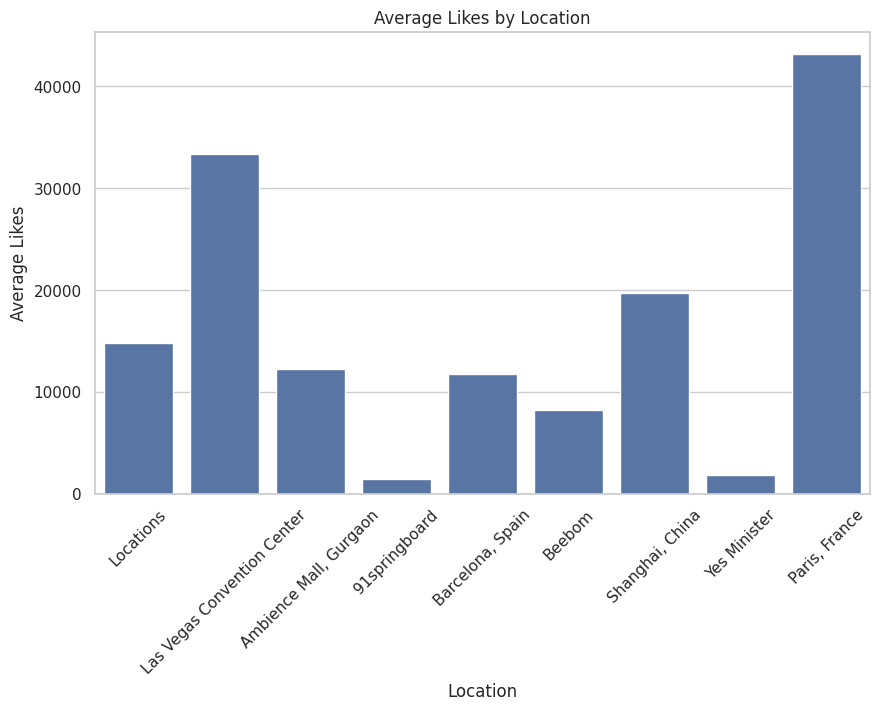

In [7]:
#Bar plot of Average Likes by Location
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='likes', data=df.reset_index(), estimator='mean', errorbar=None)
plt.title('Average Likes by Location')
plt.xlabel('Location')
plt.ylabel('Average Likes')
plt.xticks(rotation=45)
plt.show()

In [8]:
import pandas as pd

# Load the data
ndf = pd.read_excel('/content/sample_data/post_data.xlsx')

# Check column names
print("Column names:", ndf.columns)

# Strip spaces from column names
ndf.columns = ndf.columns.str.strip()

# Debug: Ensure required columns exist
required_columns = ['views', 'likes', 'comments']
for col in required_columns:
    if col not in ndf.columns:
        raise KeyError(f"Column '{col}' not found in the dataset. Available columns: {ndf.columns}")

# Convert numerical values with 'K' or 'M' suffix to proper numbers (case insensitive)
def convert_to_number(value):
    if isinstance(value, str):
        value = value.upper()  # Make the value case-insensitive
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
    try:
        return float(value)
    except ValueError:
        raise ValueError(f"Could not convert value: {value}")

# Apply conversion
ndf['views'] = ndf['views'].apply(convert_to_number)
ndf['likes'] = ndf['likes'].apply(convert_to_number)
ndf['comments'] = ndf['comments'].apply(lambda x: convert_to_number(str(x).replace(',', '')))

print("Data after cleaning:\n", ndf.head())

Column names: Index(['Profile', 'Information', 'views', 'likes', 'comments'], dtype='object')
Data after cleaning:
     Profile                                 Information      views     likes  \
0  Beebomco  1,139 posts | 3.2M followers | 6 following  4700000.0  105000.0   
1       NaN                                         NaN  1600000.0   56100.0   
2       NaN                                         NaN  1100000.0   22400.0   
3       NaN                                         NaN  2500000.0   82800.0   
4       NaN                                         NaN  1000000.0   38100.0   

   comments  
0     757.0  
1     308.0  
2     106.0  
3     256.0  
4     269.0  


<ipython-input-9-72787b12dfd1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


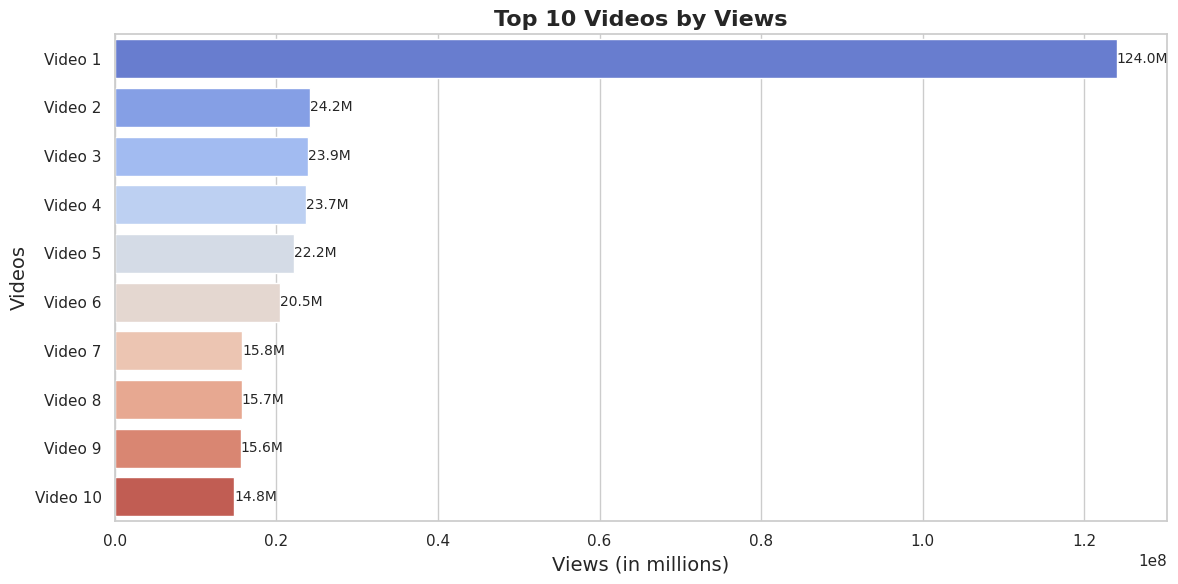

In [9]:
# 2. Bar plot: Top 10 videos by views
top10_views = ndf.nlargest(10, 'views')
plt.figure(figsize=(12, 6))

# Correct the y-axis to use rank or labels
sns.barplot(
    x=top10_views['views'],
    y=top10_views.reset_index().index,  # Use a sequential rank as the y-axis
    palette='coolwarm',
    orient='h'
)

# Annotate bars with the view values
for i, value in enumerate(top10_views['views']):
    plt.text(value, i, f'{value/1e6:.1f}M', va='center', ha='left', fontsize=10)

# Update y-axis ticks to display video rank or row index
plt.yticks(
    ticks=range(len(top10_views)),
    labels=[f"Video {i+1}" for i in range(len(top10_views))]
)

# Titles and labels
plt.title('Top 10 Videos by Views', fontsize=16, fontweight='bold')
plt.xlabel('Views (in millions)', fontsize=14)
plt.ylabel('Videos', fontsize=14)

plt.tight_layout()
plt.show()

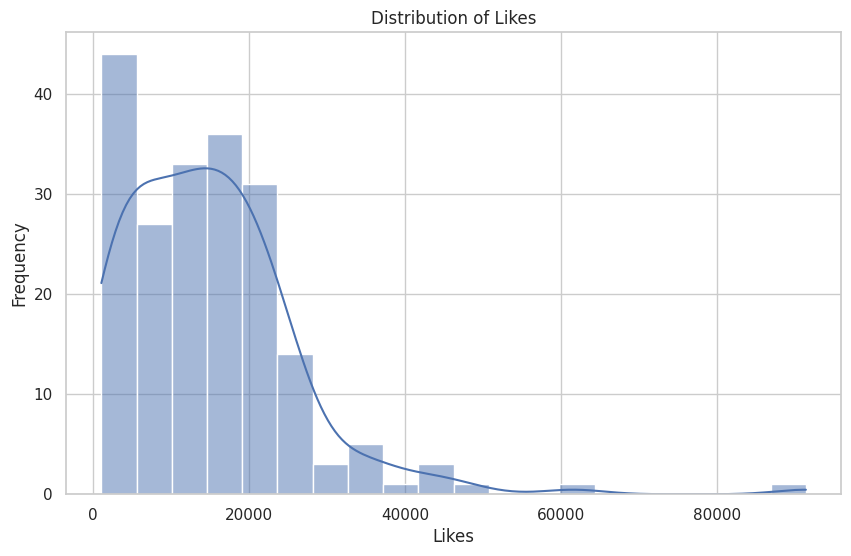

In [10]:
#Histogram of Likes Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['likes'], bins=20, kde=True)
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

<ipython-input-11-709a57caa78e>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_likes = df['likes'].resample('M').mean()  # Resampling to monthly frequency


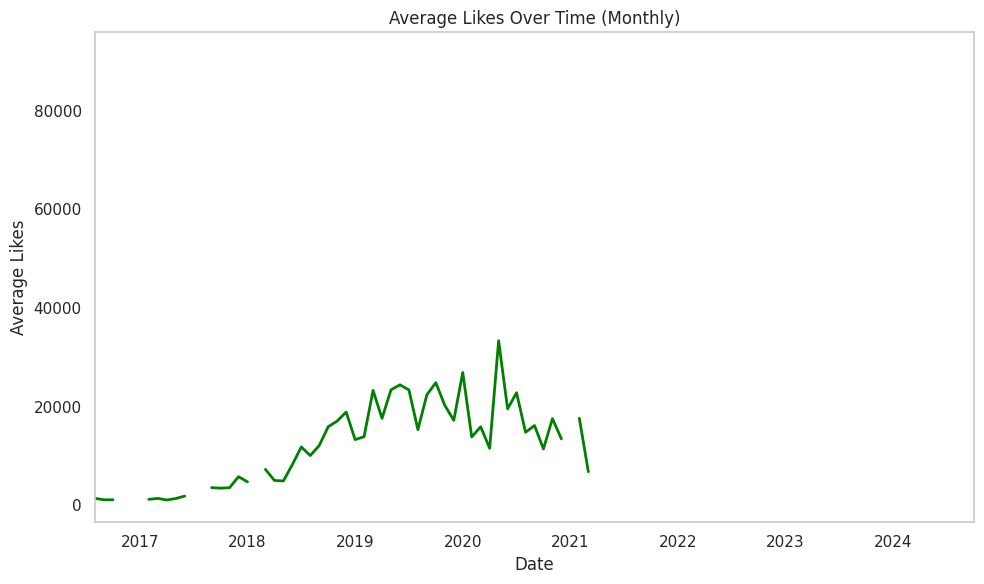

In [11]:
#Likes Over Time (Monthly Average)
plt.figure(figsize=(10, 6))
monthly_likes = df['likes'].resample('M').mean()  # Resampling to monthly frequency
monthly_likes.plot(color='green', linestyle='-', linewidth=2)
plt.title('Average Likes Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Average Likes')
plt.grid()
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [12]:
from collections import Counter

# Collect all hashtags from posts
all_hashtags = []
for post in data['posts'].values():
    all_hashtags.extend(post['hashtags'])

# List of hashtags to remove, normalized to lowercase and stripped of spaces
remhas = ['#Beebom', '#beebom', '#ShotForBeebom', '#BeeboomSquad', '#TeamBeebom','#Video','#YouTube','#Feature']
remhas_set = {tag.lower().strip() for tag in remhas}  # Use a set for faster lookups

# Filter hashtags while normalizing case and stripping spaces
filtered_hashtags = [hashtag for hashtag in all_hashtags if hashtag.lower().strip() not in remhas_set]

# Optional: Count the filtered hashtags
hashtag_counts = Counter(filtered_hashtags)

# Print the results
print("Filtered Hashtags:", filtered_hashtags)

Filtered Hashtags: ['#Photography', '#PhotoOfTheDay', '#GramSlayers', '#BeebomSquad', '#GalaxyS10e', '#GalaxyS10', '#GalaxyUnpacked', '#SamsungEvent', '#iPhoneXR', '#Apple', '#Samsung', '#GalaxyS10E', '#P20Pro', '#Pixel2XL', '#iPhoneX', '#GalaxyNote9', '#CameraTest', '#Pixel3', '#Pixel3XL', '#TeamPixel', '#MadeByGoogle', '#Photography', '#GetFeatured', '#PictureOfTheDay', '#GramSlayers', '#beauty', '#TeamPixel', '#ShotOnPixel3', '#RedmiK20Pro', '#dxomark', '#Photography', '#GetFeatured', '#PictureOfTheDay', '#GramSlayers', '#WFH', '#WorkFromHome', '#Lockdown', '#QuarantineContent', '#ShotOniPhone', '#beebom2M', '#beebom2M', '#PartnerContent', '#OppoK1', '#Fingerprint', '#NewVideo', '#MKBHD', '#CES2020', '#CES', '#Vegas', '#VisitVegas', '#Tech', '#Youtuber', '#beebom2m', '#FamBeebom', '#NewYear', '#HappyNewYear', '#2019', '#2018BestNine', '#2018', '#Love', '#HappyNewYear2019', '#FINALCUTPROX', '#AskBeebom', '#DoforKerala', '#Keralafloods', '#Keralameedsyourhelp', '#BeebomAwards', '#Best

In [13]:
top_n = 10
hashtag_counts = Counter(filtered_hashtags)
top_hashtags = hashtag_counts.most_common(top_n)
print(top_hashtags)

[('#GramSlayers', 24), ('#TeamPixel', 16), ('#Photography', 15), ('#BeebomLife', 13), ('#PictureOfTheDay', 11), ('#Pixel3XL', 10), ('#ShotOniPhone', 10), ('#Pixel3', 8), ('#GetFeatured', 8), ('#Tech', 7)]


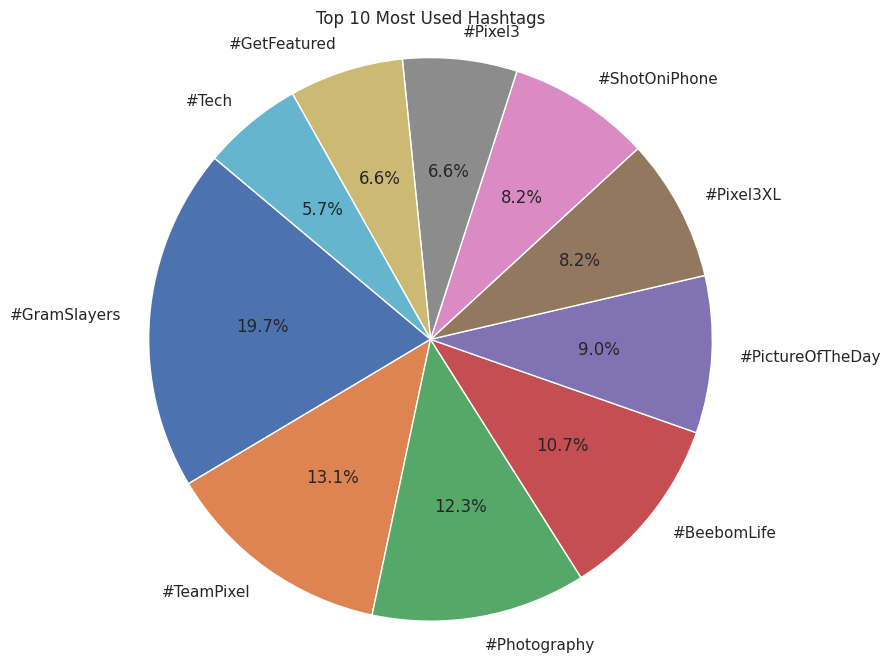

In [14]:
labels, counts = zip(*top_hashtags)

# Plot a pie chart of the most used hashtags
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f'Top {top_n} Most Used Hashtags')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()

In [15]:
comments_per_post = []
unique_commenters_per_post = []
all_commenters = []

# Extract comments data and perform calculations
for post_key, post in data['posts'].items():
    # List of usernames who commented on this post
    commenters = [comment['username'] for comment in post['comments']]
    comments_per_post.append(len(commenters))  # Count of comments for each post
    unique_commenters_per_post.append(len(set(commenters)))  # Count of unique commenters
    all_commenters.extend(commenters)  # Accumulate all commenters across posts for analysis

# Count most active users
top_n = 10
active_users = Counter(all_commenters).most_common(top_n)
active_usernames, active_user_counts = zip(*active_users)  # Separate names and counts

In [16]:
print(f"Top {top_n} Most Active Users: {active_usernames}")
print(f"Count of Top {top_n} Most Active Users: {active_user_counts}")

Top 10 Most Active Users: ('_riyas', 'kaushik.jb', 'sincerely_gagan', 'anurag._.att', 'riya_bansal._', 'vijaykalivela4', '_mr_ambrose095', 'amey_008', 'syedakter', 'mandeepssinghh')
Count of Top 10 Most Active Users: (58, 53, 33, 27, 24, 19, 18, 16, 15, 12)


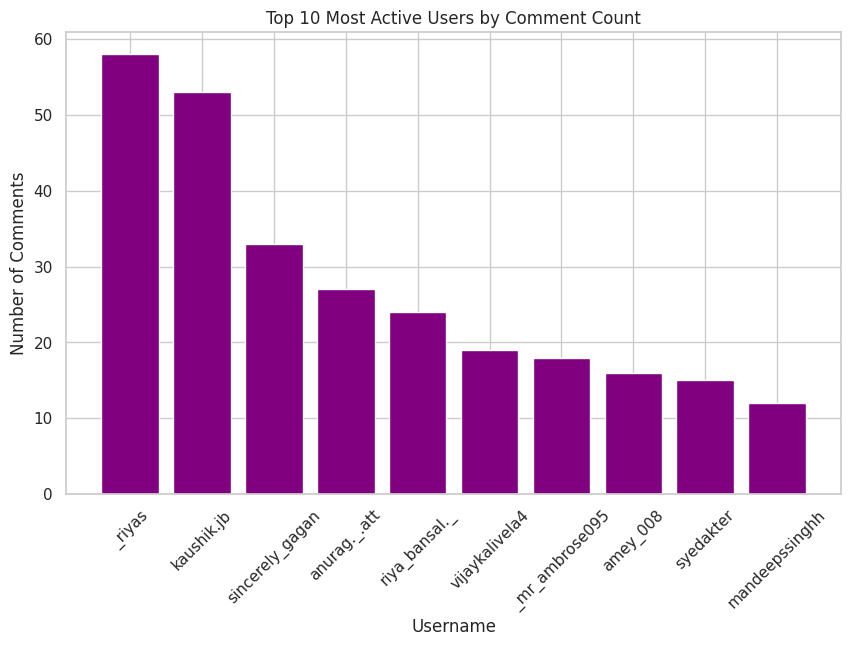

In [17]:
#Bar Chart of Most Active Users
plt.figure(figsize=(10, 6))
plt.bar(active_usernames, active_user_counts, color='purple')
plt.xlabel("Username")
plt.ylabel("Number of Comments")
plt.title("Top 10 Most Active Users by Comment Count")
plt.xticks(rotation=45)
plt.show()

In [18]:
# Placeholder average likes for example calculation (update if available)
average_likes_per_post = df.loc[:, 'likes'].mean() # Replace with actual data if known

# 1. Engagement Rate Calculation
engagement_rate = (average_likes_per_post / info['followers'][0]) * 100
print("Engagement Rate:", engagement_rate, "%")

# 2. Average Comments per Post
average_comments_per_post = df['comments_count'].mean()
print("Average Comments per Post:", average_comments_per_post)

# 3. Average Hashtags per Post
average_hashtags_per_post = df['hashtags'].mean()
print("Average Hashtags per Post:", average_hashtags_per_post)


Engagement Rate: 0.46493796875 %
Average Comments per Post: 13.075
Average Hashtags per Post: 5.845


In [19]:
# Function to calculate average likes for a hashtag
unique_hashtags=[]
for i in all_hashtags:
  if i not in unique_hashtags:
    unique_hashtags.append(i)
print(unique_hashtags)

['#ShotForBeebom', '#Beebom', '#Photography', '#PhotoOfTheDay', '#GramSlayers', '#BeebomSquad', '#GalaxyS10e', '#GalaxyS10', '#GalaxyUnpacked', '#SamsungEvent', '#iPhoneXR', '#Apple', '#Samsung', '#GalaxyS10E', '#P20Pro', '#Pixel2XL', '#iPhoneX', '#GalaxyNote9', '#Video', '#CameraTest', '#Pixel3', '#Pixel3XL', '#TeamPixel', '#MadeByGoogle', '#GetFeatured', '#Feature', '#PictureOfTheDay', '#beauty', '#ShotOnPixel3', '#RedmiK20Pro', '#dxomark', '#TeamBeebom', '#shotforbeebom', '#WFH', '#WorkFromHome', '#Lockdown', '#QuarantineContent', '#ShotForbeebom', '#ShotOniPhone', '#beebom2M', '#PartnerContent', '#OppoK1', '#Fingerprint', '#NewVideo', '#MKBHD', '#CES2020', '#CES', '#Vegas', '#VisitVegas', '#Tech', '#Youtuber', '#beebom2m', '#FamBeebom', '#NewYear', '#HappyNewYear', '#2019', '#2018BestNine', '#2018', '#Love', '#HappyNewYear2019', '#YouTube', '#FINALCUTPROX', '#AskBeebom', '#DoforKerala', '#Keralafloods', '#Keralameedsyourhelp', '#BeebomAwards', '#BestPhonesOf2020', '#2020Awards', '#

In [20]:
def calculate_avg_likes(json_data, hashtag):
    total_likes = 0
    count = 0

    for post_id, post_details in json_data["posts"].items():
        if hashtag in post_details["hashtags"]:
            likes = int(post_details["likes"].replace(",", ""))
            total_likes += likes
            count += 1

    if count == 0:
        return 0  # Avoid division by zero
    return total_likes / count
likes=[]
for i in unique_hashtags:
  average_likes = calculate_avg_likes(data,i)
  likes.append(average_likes)
print(likes)

[20503.58823529412, 16094.286624203822, 17906.666666666668, 19567.8, 22403.625, 3705.2, 22187.5, 22583.75, 27960.0, 27960.0, 22181.0, 22839.0, 27960.0, 27960.0, 11213.333333333334, 13576.0, 5414.666666666667, 11200.0, 10713.5, 4914.0, 21379.625, 19475.0, 21138.25, 15187.5, 17496.125, 17266.0, 17564.363636363636, 20255.0, 23259.5, 35726.0, 23111.0, 16972.076923076922, 17299.0, 19857.0, 24630.5, 20586.666666666668, 24630.5, 19857.0, 18512.0, 17846.0, 8492.75, 5614.0, 5614.0, 11736.666666666666, 44846.0, 33340.0, 33340.0, 26393.0, 26393.0, 15670.0, 44846.0, 26382.333333333332, 9889.0, 17420.5, 17121.25, 17197.2, 9889.0, 16888.0, 10765.6, 9889.0, 13788.0, 2022.0, 4371.5, 4087.0, 4087.0, 4087.0, 10454.0, 10454.0, 10454.0, 4463.764705882353, 13207.333333333334, 3263.0, 29404.0, 24463.0, 25306.333333333332, 14724.0, 24463.0, 24463.0, 24463.0, 27381.0, 27381.0, 25923.0, 17438.333333333332, 15103.0, 18838.0, 14418.0, 12429.25, 14418.0, 14418.0, 7707.5, 6266.0, 6266.0, 6266.0, 9098.461538461539,

In [21]:
mydata={'hashtags':unique_hashtags,'likes':likes}
df=pd.DataFrame(mydata)
print(df)

           hashtags         likes
0    #ShotForBeebom  20503.588235
1           #Beebom  16094.286624
2      #Photography  17906.666667
3    #PhotoOfTheDay  19567.800000
4      #GramSlayers  22403.625000
..              ...           ...
536         #Pride🌈   7523.000000
537     #LoveIsLove   7523.000000
538    #LoveIsLove🌈   7523.000000
539     #Section377   7523.000000
540     #section377   7523.000000

[541 rows x 2 columns]


In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Input, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Load and preprocess data
hashtags = df['hashtags']
likes = df['likes']

In [24]:
# Tokenization and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(hashtags)
sequences = tokenizer.texts_to_sequences(hashtags)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [25]:
# Normalize target variable (likes)
scaler = MinMaxScaler()
y = scaler.fit_transform(likes.values.reshape(-1, 1))

In [26]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

In [27]:
# Define the model with improvements
sequence_input = Input(shape=(max_length,))
embedding = Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length)(sequence_input)
lstm_out = Bidirectional(LSTM(128, return_sequences=False))(embedding)
dropout = Dropout(0.5)(lstm_out)
dense_out = Dense(64, activation='relu')(dropout)
output = Dense(1, activation='linear')(dense_out)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [28]:
model = Model(inputs=sequence_input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define callbacks for early stopping and learning rate scheduling
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

def lr_schedule(epoch, lr):
    if epoch > 10:
        return lr * 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    callbacks=[early_stopping, lr_scheduler]
)

# Evaluate the model
results = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (MSE): {results[0]}, Test MAE: {results[1]}")

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0544 - mae: 0.1780 - val_loss: 0.0498 - val_mae: 0.1454 - learning_rate: 0.0010
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0355 - mae: 0.1303 - val_loss: 0.0423 - val_mae: 0.1432 - learning_rate: 0.0010
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0314 - mae: 0.1340 - val_loss: 0.0435 - val_mae: 0.1328 - learning_rate: 0.0010
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0291 - mae: 0.1129 - val_loss: 0.0432 - val_mae: 0.1321 - learning_rate: 0.0010
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0267 - mae: 0.1090 - val_loss: 0.0417 - val_mae: 0.1345 - learning_rate: 0.0010
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0180 - mae: 0.0852 - val_loss: 0.0419 - val_mae: 0.1334 - learning_rate: 0.0010
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0158 - mae: 0.0798 - val_loss: 0.0440 - val_mae: 0.1336 - learning_rate: 0.0010
Epoch 8/50
13

In [29]:
# Prediction function
def predict_likes(hashtag):
    seq = tokenizer.texts_to_sequences([hashtag])
    padded_seq = pad_sequences(seq, maxlen=max_length, padding='post')
    pred = model.predict(padded_seq)
    return scaler.inverse_transform(pred)[0][0]  # Scale back to original range

# Test the prediction function
test_hashtag = '#rating'
print(f"Predicted likes for {test_hashtag}: {predict_likes(test_hashtag)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
Predicted likes for #rating: 23546.125


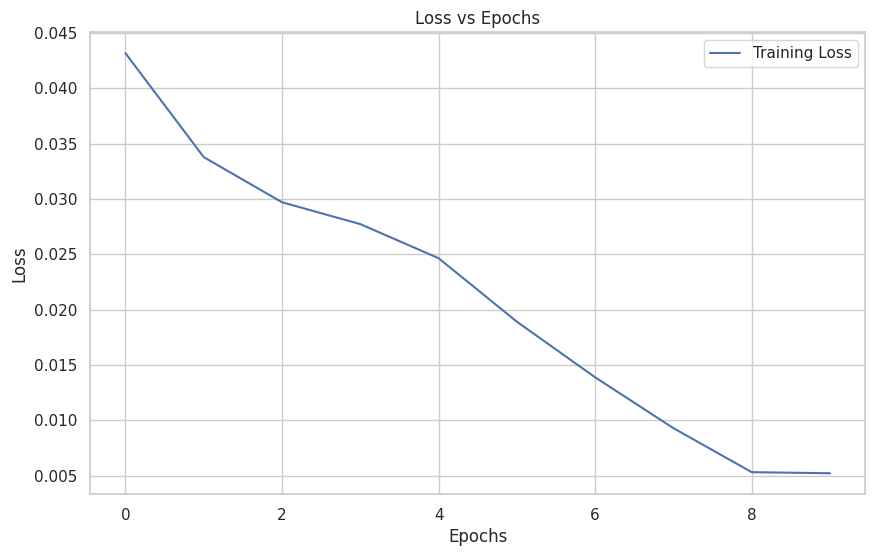

In [30]:
import matplotlib.pyplot as plt

# Plotting the loss values over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.grid(True)
plt.show()